In [61]:
from scipy.ndimage import gaussian_filter as gauss
from sklearn.cluster import DBSCAN
import numpy as np

import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname('../.'))
from scripts.utils import print_img, print_imgs, get_path

In [14]:
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=10, min_samples=2).fit(X)

In [15]:
clustering.labels_

array([ 0,  0,  0,  0,  0, -1])

In [17]:
sample_index = "228"
path_to_vol = get_path(f"/home/msst/IXI_MRA_work/IXI{sample_index}", key="head")

import torchio as tio
subject_dict = {"sample_name" : f"IXI077",
                'head': tio.ScalarImage(path_to_vol)}
subject = tio.Subject(subject_dict)
subject = tio.transforms.ZNormalization()(subject)

In [20]:
vol = subject.head.data[0]
vol.shape

torch.Size([512, 512, 100])

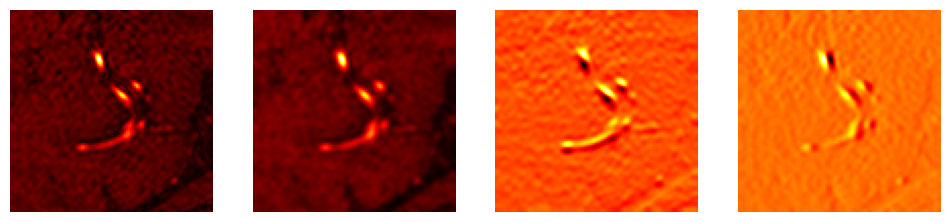

In [116]:
fig, ax = plt.subplots(1, 4, figsize=(12, 6))    
#print_img(vol, ax, slice_=31, title='Image', cmap='hot', bar=0)  
for a in ax:
    a.axis('off')
    
img = vol[270:370, 240:340, 31].numpy()
blured = gauss(img, sigma=1)
grad = np.gradient(blured)

ax[0].imshow(img, cmap='hot')
ax[1].imshow(blured, cmap='hot')
ax[2].imshow(grad[0], cmap='hot')
ax[3].imshow(grad[1], cmap='hot')

In [73]:
H = np.histogram(img)
H = np.histogram(img[])

In [82]:
print(H[0], H[0].shape)
print(H[1], H[1].shape)

[3731 6028  114   58   36   10   12    5    1    5] (10,)
[-0.67977715  1.2009137   3.0816045   4.962295    6.842986    8.723677
 10.604367   12.485058   14.365749   16.246439   18.12713   ] (11,)


In [101]:
delta = H[1][1]-H[1][0]
delta

1.8806908

<BarContainer object of 10 artists>

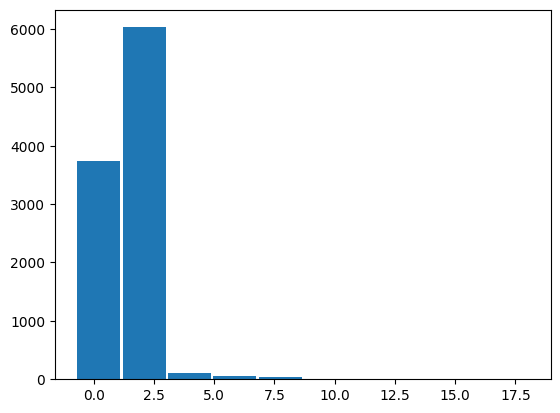

In [104]:
plt.bar(H[1][:-1], H[0], width=0.95*delta, align='edge')

(100, 100)


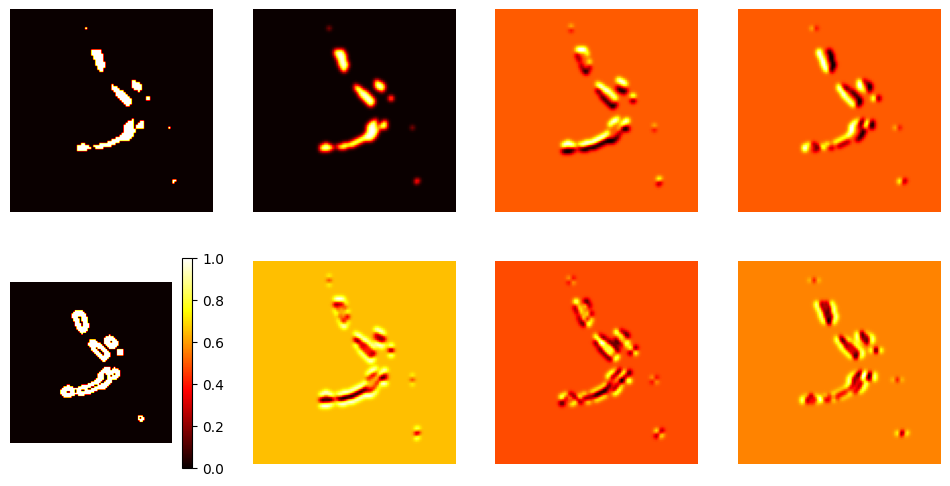

In [147]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))    
#print_img(vol, ax, slice_=31, title='Image', cmap='hot', bar=0)  
s = ax.shape
for i in range(s[0]):
    for j in range(s[1]):
        ax[i, j].axis('off')
   
img2 = (img>3).astype(float)
print(img2.shape)
blured = gauss(img2, sigma=1)
grad = np.array(np.gradient(blured))

grad_norm = np.sqrt((grad**2).sum(axis=0))

hess_xx, hess_xy = np.gradient(grad[0])
hess_yx, hess_yy = np.gradient(grad[1])

ax[0][0].imshow(img2, cmap='hot')
ax[0][1].imshow(blured, cmap='hot')
ax[0][2].imshow(grad[0], cmap='hot')
ax[0][3].imshow(grad[1], cmap='hot')

im = ax[1][0].imshow(grad_norm>0.1, cmap='hot')
ax[1][1].imshow(hess_xx, cmap='hot')
ax[1][2].imshow(hess_yx, cmap='hot')
ax[1][3].imshow(hess_yy, cmap='hot')

plt.colorbar(im)